=== Reporte de Clasificación - Árbol de Decisión ===
                   precision    recall  f1-score   support

 Derecho de Autor       0.99      1.00      0.99        83
Diseño Industrial       1.00      1.00      1.00        73
            Marca       1.00      1.00      1.00        72
          Patente       1.00      0.99      0.99        72

         accuracy                           1.00       300
        macro avg       1.00      1.00      1.00       300
     weighted avg       1.00      1.00      1.00       300



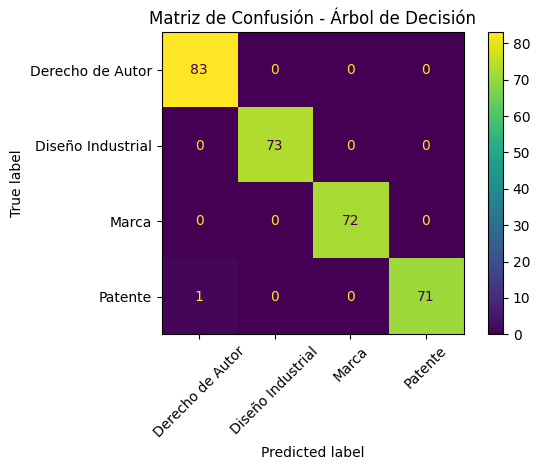

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Leer archivo CSV
df = pd.read_csv('./activos_pi.csv', encoding='latin1')

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df["descripcion"], df["categoria"], test_size=0.3, random_state=42
)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predicciones
y_pred = clf.predict(X_test_tfidf)

# Resultados
print("=== Reporte de Clasificación - Árbol de Decisión ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.tight_layout()
plt.show()


In [17]:
# Nueva descripción para probar
nueva_descripcion = ["obra musical sinfónica para violines"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: obra musical sinfónica para violines
Predicción de categoría: Patente


In [18]:
# Nueva descripción para probar
nueva_descripcion = ["un dispositivo mejorado para la comunicación inalambrica"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un dispositivo mejorado para la comunicación inalambrica
Predicción de categoría: Patente


In [19]:
# Nueva descripción para probar
nueva_descripcion = ["un logotipo para una empresa"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un logotipo para una empresa
Predicción de categoría: Patente


In [20]:
# Nueva descripción para probar
nueva_descripcion = ["diseño estético de una botella"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: diseño estético de una botella
Predicción de categoría: Derecho de Autor
